# Задание 2.1

## Практика

In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv("files/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [25]:
df.shape

(1259, 27)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [27]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [28]:
df.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [40]:
feature_names = df.columns.tolist()
for column in feature_names:
	print(column)
	print(df[column].value_counts(dropna=False))

Timestamp
Timestamp
2014-08-27 12:43:28    2
2014-08-27 15:55:07    2
2014-08-27 12:54:11    2
2014-08-27 12:44:51    2
2014-08-27 12:37:50    2
                      ..
2015-04-02 15:47:43    1
2015-04-04 11:22:05    1
2015-04-06 14:58:29    1
2015-04-11 14:35:22    1
2016-02-01 23:04:31    1
Name: count, Length: 1246, dtype: int64
Age
Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 50              6
 48              6
 20              6
 51              5
 56              4
 49              4
 57        

In [41]:
features = df.drop('treatment', axis=1)
labels = df['treatment']

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='constant')
imputer.fit(features)
features = imputer.transform(features)

In [43]:
male_terms = ["male", "m", "mal", "msle", "malr", "mail", "make", "cis male", "man", "maile", "male (cis)", "cisman"]
female_terms = ["female", "f", "woman", "femake", "femaile", "femake", "cis female", "cis-female/femme", "female (cis)", "femail", "cis woman"]

def clean_gender(response):
	if response.lower().rstrip() in male_terms:
		return "Male"
	elif response.lower().rstrip() in female_terms:
		return "Female"
	else:
		return "Other"
	
df['Gender'] = df['Gender'].apply(lambda x: clean_gender(x))

df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [44]:
df.Age.loc [(df.Age <14) | (df.Age> 100)] = np.nan

C:\Users\ngorb\AppData\Local\Temp\ipykernel_8264\2261551098.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Age.loc [(df.Age <14) | (df.Age> 100)] = np.nan
C:\Users\ngorb\AppData\Local\Temp\ipykernel_8264\2261551098.py:1: SettingWithC

C:\Users\ngorb\AppData\Local\Temp\ipykernel_8264\673491339.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(df.Age.dropna())


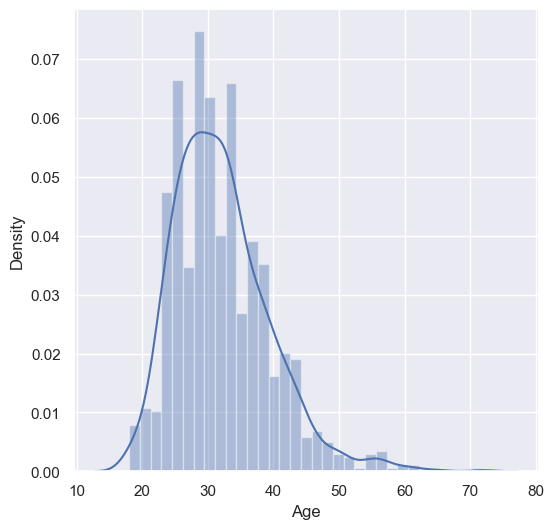

In [45]:
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
plot = sns.distplot(df.Age.dropna())
plot.figure.set_size_inches(6,6)

In [46]:
df['leave'].value_counts(dropna=False)

leave
Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: count, dtype: int64

In [47]:
df['leave'] = df['leave'].map({'Very difficult': 0,
															 'Somewhat difficult': 1,
															 'Don\'t know': 2,
															 'Somewhat easy': 3,
															 'Very easy': 4})
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,3,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,2,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,1,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,1,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,2,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['leave'])
label_encoder.transform(df['leave'])

array([3, 2, 1, ..., 1, 2, 2], shape=(1259,))

In [49]:
pd.get_dummies(df, columns=["leave"], prefix=["leave"]).head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,leave_0,leave_1,leave_2,leave_3,leave_4
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,Maybe,Yes,No,NaN,False,False,False,True,False
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,Don't know,No,NaN,False,False,True,False,False
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Yes,Yes,No,No,NaN,False,True,False,False,False
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Maybe,Maybe,No,Yes,NaN,False,True,False,False,False
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Yes,Yes,Don't know,No,NaN,False,False,True,False,False


In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
ct=OneHotEncoder()
ct_res=ct.fit_transform(df[['leave']])

In [51]:
ct_res.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], shape=(1259, 5))

In [52]:
df = df.join(pd.DataFrame(ct_res.toarray(), columns=ct.categories_))
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,"(0,)","(1,)","(2,)","(3,)","(4,)"
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,Maybe,Yes,No,NaN,0.0,0.0,0.0,1.0,0.0
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,Don't know,No,NaN,0.0,0.0,1.0,0.0,0.0
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Yes,Yes,No,No,NaN,0.0,1.0,0.0,0.0,0.0
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Maybe,Maybe,No,Yes,NaN,0.0,1.0,0.0,0.0,0.0
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Yes,Yes,Don't know,No,NaN,0.0,0.0,1.0,0.0,0.0


## Самостоятельная

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("files/bank.csv", sep=";")
df.head()

,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Займ,Контакт,Месяц,День недели,...,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Нет
1,30,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
2,39,Голубой воротничок,Женат / замужем,Базовое (9 классов),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
3,42,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
4,42,Самозанятый,Женат / замужем,Базовое (4 класса),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да


Согласно методическим указаниями, в bank.csv должны быть только столбцы 

1. Age – возраст клиента.
2. Job – профессия клиента (ее тип).
3. Martial – семейное положение клиента.
4. Education – уровень образования клиента.
5. Default – Имеется ли доступ к кредитным средствам в банке?
6. Housing – Наличие ипотеки на текущий момент.
7. Loan – Есть сейчас потребительский кредит.
8. Balance – Состояние личного счета клиента.
9. Contact – Тип связи с клиентом.
10. Month – Месяц, в котором был последний контакт с клиентом (в течение года).
11. Day– День, в который был последний контакт с клиентом (в течение недели).
12. Duration – Продолжительность последнего контакта с клиентом (в секундах).
13. Campaign – Количество контактов (звонки, сообщения и т.п.), выполненных в ходе этой кампании и для данного клиента.
14. Pdays – Количество дней, прошедших с момента последнего подключения клиента к предыдущей кампании.
15. Previous – Предыдущее количество контактов, выполненных до этой кампании для этого клиента.
16. Poutcome – Результат предыдущей маркетинговой кампании.
17. Deposit – Есть ли у клиента срочный вклад в банке.

В данный момент там так же еще есть следующие столбцы

1. Колебание уровня безработицы;
2. Индекс потребительских цен;
3. Индекс потребительской уверенности;
4. Европейская межбанковская ставка;
5. Количество сотрудников в компании; - этот столбец имеет в себе вещественные числа, что никак не вяжется с количеством сотрудников
6. y - очень таинственный столбец, не имею понятия что значит это категориальное "да/нет"

In [2]:
df.shape

(41188, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Возраст                             41188 non-null  int64  
 1   Работа                              41188 non-null  object 
 2   Семейный статус                     41188 non-null  object 
 3   Образование                         41188 non-null  object 
 4   Кредитный дефолт                    41188 non-null  object 
 5   Ипотека                             41188 non-null  object 
 6   Займ                                41188 non-null  object 
 7   Контакт                             41188 non-null  object 
 8   Месяц                               41188 non-null  object 
 9   День недели                         41188 non-null  object 
 10  Длительность                        41186 non-null  float64
 11  Кампания                            41188

In [4]:
df.describe()

,Возраст,Длительность,Кампания,День,Предыдущий контакт,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании
count,41188.00000,41186.000000,41188.000000,1515.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.249041,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.234158,2.770014,3.824906,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.nunique()

Возраст                                 78
Работа                                  11
Семейный статус                          4
Образование                              8
Кредитный дефолт                         3
Ипотека                                  3
Займ                                     3
Контакт                                  2
Месяц                                   10
День недели                              5
Длительность                          1543
Кампания                                42
День                                    26
Предыдущий контакт                       8
Доходность                               3
Колебание уровня безработицы            10
Индекс потребительских цен              26
Индекс потребительской уверенности      26
Европейская межбанковская ставка       316
Количество сотрудников в компании       11
y                                        2
dtype: int64

In [6]:
feature_names = df.columns.tolist()
fp = open('files/textfile.txt', 'w', encoding='utf-8')
for column in feature_names:
  print(df[column].value_counts(dropna=False))
  fp.write(str(df[column].value_counts(dropna=False)) + '\n \n')
fp.close()

Возраст
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64
Работа
Менеджер                  13346
Голубой воротничок         9254
Техник                     6743
Обслуживающий персонал     3969
Самозанятый                2279
Пенсионер                  1720
Преддприниматель           1456
Домохозяйка                1060
Студент                     875
Неизвестно                  330
Cамозанятый                 156
Name: count, dtype: int64
Семейный статус
Женат / замужем          24928
Не женат / не замужем    11568
Разведен(-а)              4612
Неизвестно                  80
Name: count, dtype: int64
Образование
Университетская степень    12168
Высшая школа                9515
Базовое (9 классов)         6045
Профессиональный курс       5243
Базовое (4 класса)          4176
Базовое (6 классов)         2292
Неизвестно                  1731
Неграмотный                   18
Name: 

Согласно этому коду:
  
1. Возраст: С возрастом всё в порядке, он принимает значения от 31 до 94. Люди вполне могут столько жить
2. Работа: Менеджер и голубой воротничок - одно и то же. Также имеются два вхождения самозанятых, которые отличются заглавной буквой (английская "цэ" и русская "эс").
3. Семейный статут: будто бы никаких замечаний нет, если под категорией "Не женат" подразумевается именно холостое состояние до первого заключенного брака.
4. Образование: всё в порядке, возможно общее образование слишком детализировано, учитывая специфику людей, чей возраст начинается с 32 лет. Для банка не очень то и важно, насколько человек не доучился в школе, соответственно, можно заменить "Базовое (9 классов)" на "Базовое", а две категории "Базовое (4 класса)" и "Базовое (6 классов)" объединить в "Неполное базовое"
5. Кредитный дефолт: нет вопросов
6. Ипотека: нет вопросов
7. Займ: нет вопросов
8. Контакт: нет вопросов
9. Месяц: нет вопросов
10. День недели: из категоризации можно сделать вывод, что банк по выходным не работает. Нет вопросов.
11. Длительность: секундочки, нет вопросов.
12. Компания: нетт вопросов, указано количество контактов
13. День: количество дней, прошедших с момента подклчюеиня предыдущей компании. Много NaN значений, означающее что у многих клиентов это первое поодключение компании.
14. Предыдущий контакт: количество прошлых контактов. Нет вопросов
15. Доходность: категорийный параметр, результаты предыдущей компании. Нет вопросов.
16. Колебания уровня безработицы
17. Индекс потребительских цен
18. Индекс потребительской уверенности
19. Европейская межбансковская ставка
20. Количество сотрудников в компании
21. y

In [7]:
df['Работа'] = df['Работа'].replace({
	'Голубой воротничок': 'Менеджер',
	'Cамозанятый' : 'Самозанятый'
})

df['Образование'] = df['Образование'].replace({
	'Базовое (9 классов)' : 'Базовое',
	'Базовое (4 класса)' : 'Неполное базовое',
	'Базовое (6 классов)' : 'Неполное базовое',
})

print(df['Работа'].value_counts())
print(df['Образование'].value_counts())

Работа
Менеджер                  22600
Техник                     6743
Обслуживающий персонал     3969
Самозанятый                2435
Пенсионер                  1720
Преддприниматель           1456
Домохозяйка                1060
Студент                     875
Неизвестно                  330
Name: count, dtype: int64
Образование
Университетская степень    12168
Высшая школа                9515
Неполное базовое            6468
Базовое                     6045
Профессиональный курс       5243
Неизвестно                  1731
Неграмотный                   18
Name: count, dtype: int64


In [8]:
# Обработка пропущенных значений

df['Доходность'] = df['Доходность'].replace('Отсутствует', np.nan)

# Преобразование в числовой тип
df['Доходность'] = pd.to_numeric(df['Доходность'], errors='coerce')

# Заполнение медианой
median_income = df['Доходность'].median()
df['Доходность'] = df['Доходность'].fillna(median_income)

# Проверка других пропусков
print("\nКоличество пропусков после обработки:")
print(df.isnull().sum())


Количество пропусков после обработки:
Возраст                                   0
Работа                                    0
Семейный статус                           0
Образование                               0
Кредитный дефолт                          0
Ипотека                                   0
Займ                                      0
Контакт                                   0
Месяц                                     0
День недели                               0
Длительность                              2
Кампания                                  0
День                                  39673
Предыдущий контакт                        0
Доходность                            41188
Колебание уровня безработицы              0
Индекс потребительских цен                0
Индекс потребительской уверенности        0
Европейская межбанковская ставка          0
Количество сотрудников в компании         0
y                                         0
dtype: int64


e:\HomeWork\TANN-notebooks\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [9]:
df.to_csv('files/preprocessed_bank.csv')
features = df.drop(columns='Ипотека')
labels = df['Ипотека']

In [10]:
features

,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Займ,Контакт,Месяц,День недели,Длительность,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Городской телефон,Октябрь,Пятница,24.0,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Нет
1,30,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Городской телефон,Октябрь,Пятница,223.0,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да
2,39,Менеджер,Женат / замужем,Базовое,Нет,Нет,Городской телефон,Октябрь,Пятница,270.0,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да
3,42,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Городской телефон,Октябрь,Пятница,103.0,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да
4,42,Самозанятый,Женат / замужем,Неполное базовое,Нет,Нет,Городской телефон,Октябрь,Пятница,478.0,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,68,Пенсионер,Разведен(-а),Высшая школа,Нет,Нет,Сотовый телефон,Октябрь,Понедельник,222.0,1,NaN,0,NaN,-1.1,94.601,-49.5,1.000,4963.6,Да
41184,68,Пенсионер,Разведен(-а),Высшая школа,Нет,Да,Сотовый телефон,Октябрь,Понедельник,567.0,1,3.0,1,NaN,-1.1,94.601,-49.5,1.000,4963.6,Да
41185,74,Пенсионер,Разведен(-а),Неполное базовое,Нет,Нет,Сотовый телефон,Октябрь,Понедельник,102.0,3,3.0,2,NaN,-1.1,94.601,-49.5,1.000,4963.6,Нет
41186,74,Пенсионер,Разведен(-а),Неполное базовое,Нет,Нет,Сотовый телефон,Октябрь,Понедельник,180.0,2,NaN,0,NaN,-1.1,94.601,-49.5,1.000,4963.6,Нет


In [11]:
labels

0        Нет
1        Нет
2        Нет
3         Да
4        Нет
        ... 
41183     Да
41184     Да
41185     Да
41186     Да
41187     Да
Name: Ипотека, Length: 41188, dtype: object

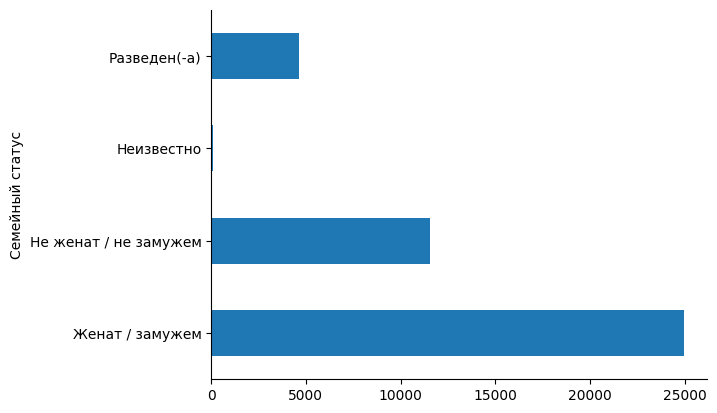

In [12]:
#Семейный статус

from matplotlib import pyplot as plt

features.groupby('Семейный статус').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

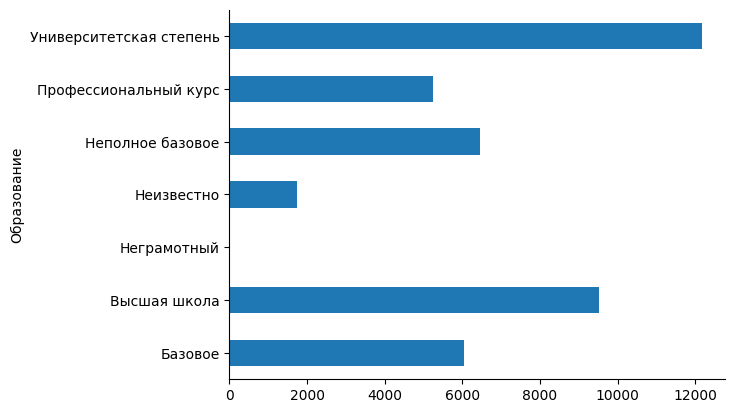

In [13]:
features.groupby('Образование').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

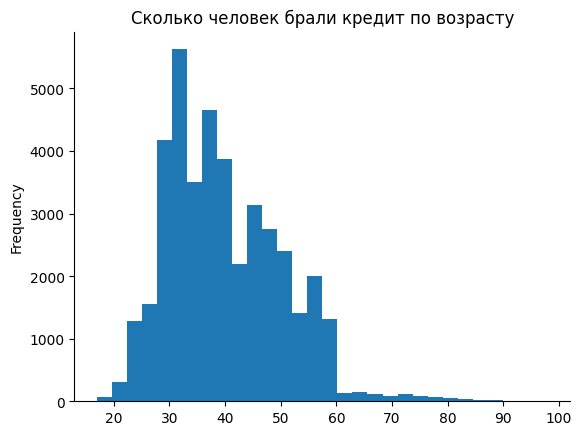

In [14]:
features['Возраст'].plot(kind='hist', bins=30, title='Сколько человек брали кредит по возрасту')
plt.gca().spines[['top', 'right',]].set_visible(False)

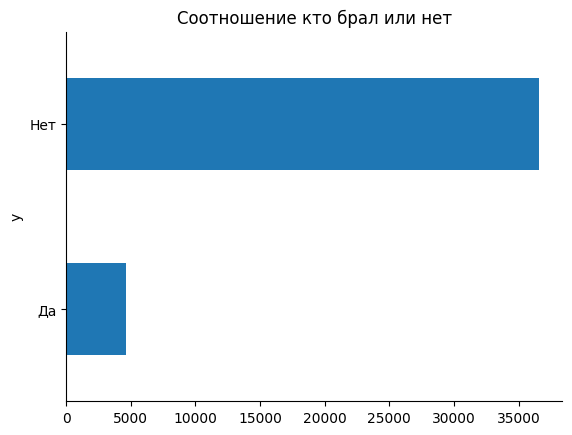

In [15]:
features.groupby('y').size().plot(kind='barh', title='Соотношение кто брал или нет')
plt.gca().spines[['top', 'right',]].set_visible(False)

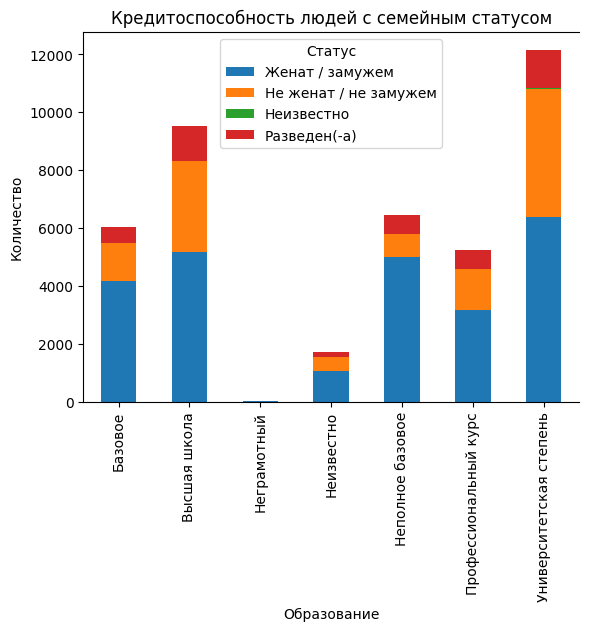

In [16]:
features.groupby(['Образование', 'Семейный статус']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Кредитоспособность людей с семейным статусом')
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.gca().spines['right'].set_visible(False)
plt.legend(title='Статус')
plt.show()

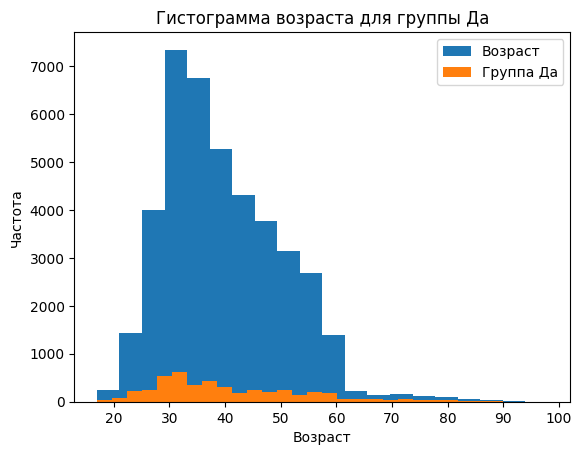

In [17]:
features['Возраст'].plot(kind='hist', bins=20, title='Возраст')
group = 'Да'
data = features[features['y'] == group]['Возраст']
plt.hist(data, bins=30, label=f'Группа {group}')
plt.title(f'Гистограмма возраста для группы {group}')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()
plt.show()

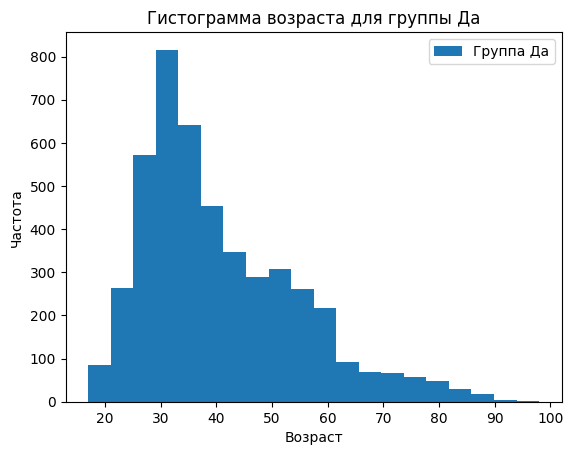

In [18]:
group = 'Да'
data = features[features['y'] == group]['Возраст']
plt.hist(data, bins=20, label=f'Группа {group}')
plt.title(f'Гистограмма возраста для группы {group}')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()
plt.show()

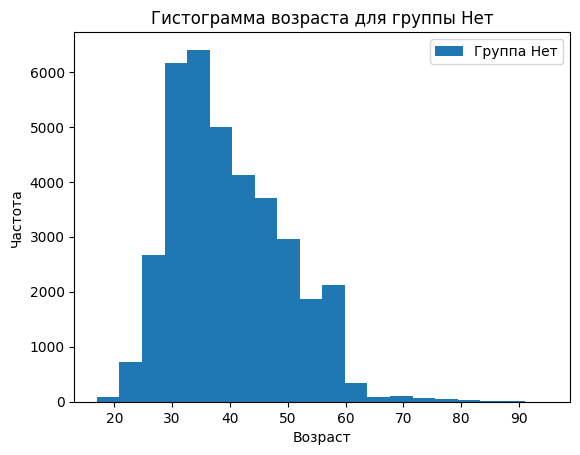

In [19]:
from matplotlib import pyplot as plt
group = 'Нет'
data = features[features['y'] == group]['Возраст']
plt.hist(data, bins=20, label=f'Группа {group}')
plt.title(f'Гистограмма возраста для группы {group}')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()
plt.show()

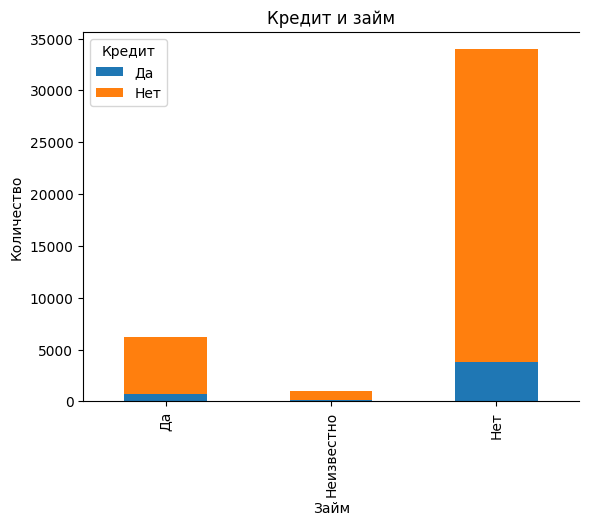

In [20]:
features.groupby(['Займ', 'y']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Кредит и займ')
plt.xlabel('Займ')
plt.ylabel('Количество')
plt.gca().spines['right'].set_visible(False)
plt.legend(title='Кредит')
plt.show()

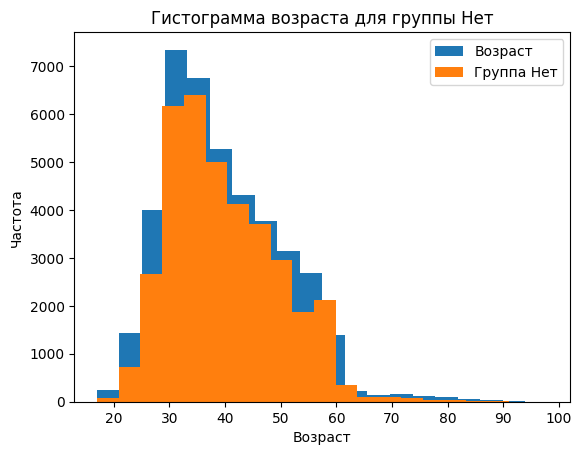

In [21]:
features['Возраст'].plot(kind='hist', bins=20, title='Возраст')
group = 'Нет'
data = features[features['y'] == group]['Возраст']
plt.hist(data, bins=20, label=f'Группа {group}')
plt.title(f'Гистограмма возраста для группы {group}')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()
plt.show()

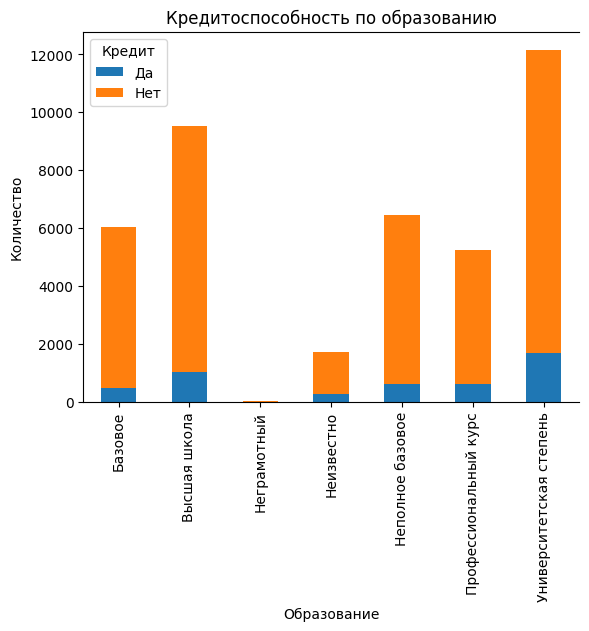

In [22]:
features.groupby(['Образование', 'y']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Кредитоспособность по образованию')
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.gca().spines['right'].set_visible(False)
plt.legend(title='Кредит')
plt.show()

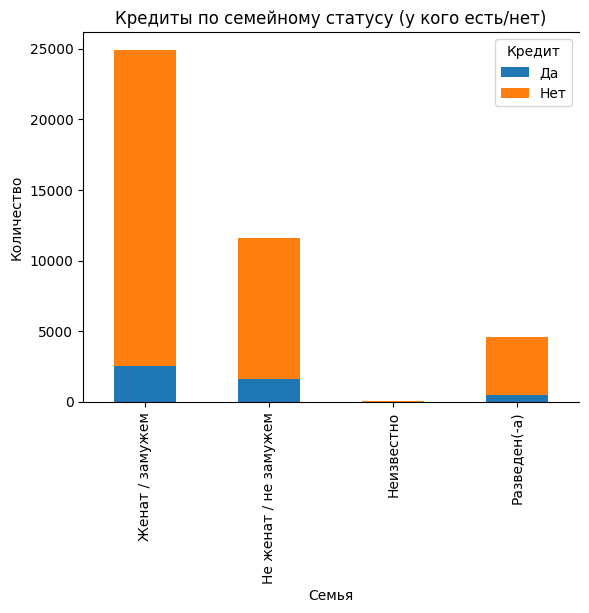

In [23]:
features.groupby(['Семейный статус', 'y']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Кредиты по семейному статусу (у кого есть/нет)')
plt.xlabel('Семья')
plt.ylabel('Количество')
plt.gca().spines['right'].set_visible(False)
plt.legend(title='Кредит')
plt.show()